In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from scipy.integrate import quad

G = 6.67*10**(-11) # m^3/(kg*s^2)
g = 9.81 # m/s^2
M_Earth = 5.9*10**24 # kg
M_Moon = 7.3*10**22 # kg
m_Apollo = 5500 # kg
d_Earth_Moon = 3.8*10**8 # m
v_exhaust = 2.4*10**3 # m/s
burn_rate = 1.3*10**4 # kg/s
m_wet = 2.8*10**6 # kg
m_dry = 7.5*10**5 # kg
n_big = 1001

# Part 1: The Gravitational Potential of the Earth

In [2]:
# Question 1

def nonvect_potential(M, x_M, y_M, x, y):
    r = np.sqrt((x-x_M)**2 + (y-y_M)**2)
    if r == 0:
        return np.nan
    else:
        return -G*M/r
potential = np.vectorize(nonvect_potential)

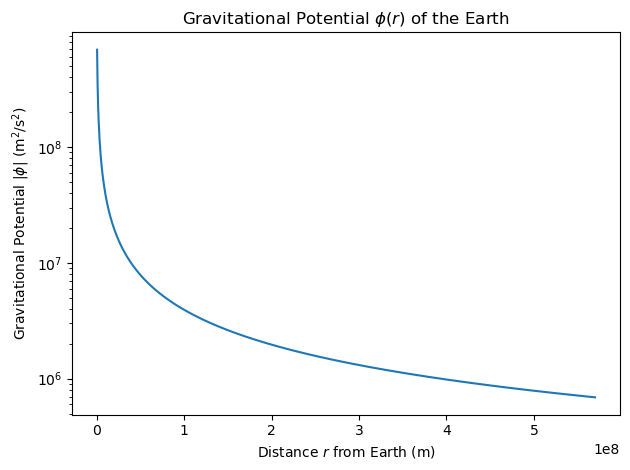

In [3]:
# Question 2

fig, ax = plt.subplots()
x_vals = np.linspace(0, 1.5*d_Earth_Moon, n_big)
phi_vals = np.abs(potential(M_Earth, 0, 0, x_vals, 0))
ax.plot(x_vals, phi_vals)
ax.set_yscale("log")

ax.set_title(r'Gravitational Potential $\phi$($r$) of the Earth')
ax.set_xlabel(r'Distance $r$ from Earth (m)')
ax.set_ylabel(r'Gravitational Potential |$\phi$| (m$^2$/s$^2$)')
plt.tight_layout()
plt.savefig("Lab 1 Part 1 Question 2")

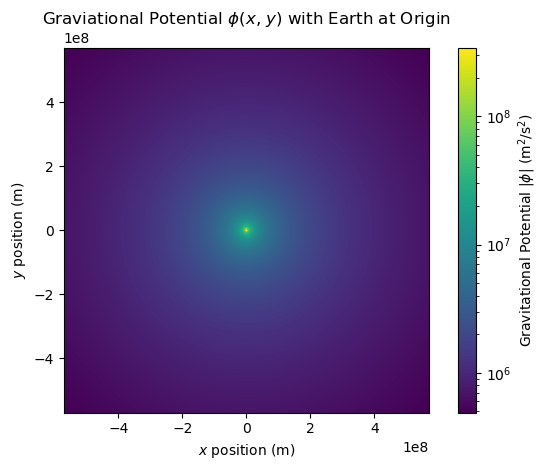

In [4]:
# Question 3

x_vals = np.linspace(-1.5*d_Earth_Moon, 1.5*d_Earth_Moon, n_big)
y_vals = np.linspace(-1.5*d_Earth_Moon, 1.5*d_Earth_Moon, n_big)
x_grid, y_grid = np.meshgrid(x_vals, y_vals)
phi_vals = np.abs(potential(M_Earth, 0, 0, x_grid, y_grid))

fig, ax = plt.subplots()
mesh = ax.pcolormesh(x_grid, y_grid, phi_vals, norm="log")
ax.set_aspect("equal")
cbar = fig.colorbar(mesh)

ax.set_title(r'Graviational Potential $\phi$($x$, $y$) with Earth at Origin')
ax.set_xlabel(r'$x$ position (m)')
ax.set_ylabel(r'$y$ position (m)')
cbar.set_label(r'Gravitational Potential |$\phi$| (m$^2$/s$^2$)')
plt.tight_layout()
plt.savefig("Lab 1 Part 1 Question 3")

# Part 2: The Gravitational Potential of the Earth-Moon System

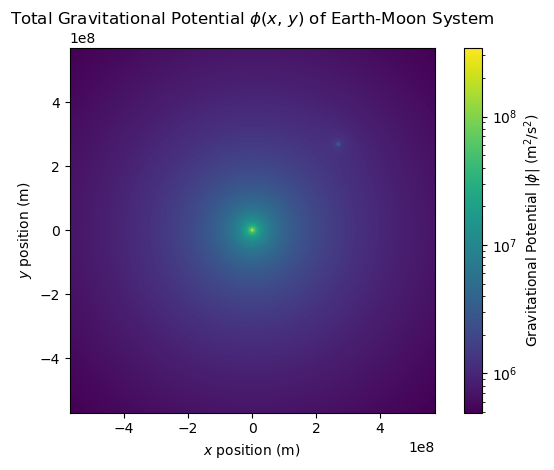

In [5]:
# Question 1

x_vals = np.linspace(-1.5*d_Earth_Moon, 1.5*d_Earth_Moon, n_big)
y_vals = np.linspace(-1.5*d_Earth_Moon, 1.5*d_Earth_Moon, n_big)
x_grid, y_grid = np.meshgrid(x_vals, y_vals)
phi_vals = np.abs(potential(M_Earth, 0, 0, x_grid, y_grid) + potential(M_Moon, d_Earth_Moon/np.sqrt(2), d_Earth_Moon/np.sqrt(2), x_grid, y_grid))

fig, ax = plt.subplots()
mesh = ax.pcolormesh(x_grid, y_grid, phi_vals, norm="log")
ax.set_aspect("equal")
cbar = fig.colorbar(mesh)

ax.set_title(r'Total Gravitational Potential $\phi$($x$, $y$) of Earth-Moon System')
ax.set_xlabel(r'$x$ position (m)')
ax.set_ylabel(r'$y$ position (m)')
cbar.set_label(r'Gravitational Potential |$\phi$| (m$^2$/s$^2$)')
plt.tight_layout()
plt.savefig("Lab 1 Part 1 Question 1")

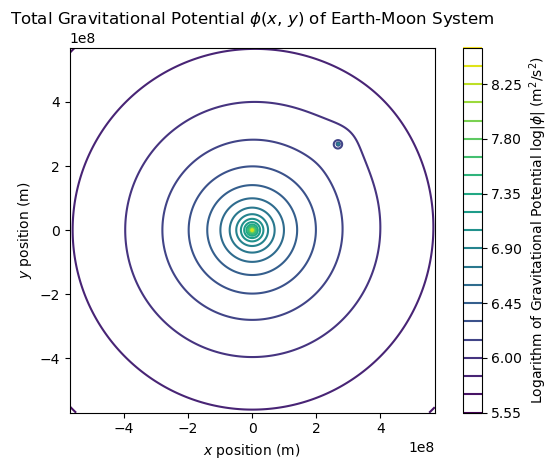

In [6]:
# Question 2

fig, ax = plt.subplots()
contour = ax.contour(x_grid, y_grid, np.log10(phi_vals), levels=25)
ax.set_aspect("equal")
cbar = fig.colorbar(contour)

ax.set_title(r'Total Gravitational Potential $\phi$($x$, $y$) of Earth-Moon System')
ax.set_xlabel(r'$x$ position (m)')
ax.set_ylabel(r'$y$ position (m)')
cbar.set_label(r'Logarithm of Gravitational Potential log|$\phi$| (m$^2$/s$^2$)')
plt.tight_layout()
plt.savefig("Lab 1 Part 2 Question 2")

# Part 3: The Gravitational Force Field of the Earth-Moon System

In [7]:
# Question 1

def nonvect_gravitational_force(M_1, m_2, x_1, y_1, x_2, y_2):
    r_sqr = (x_1 - x_2)**2 + (y_1 - y_2)**2
    #theta = np.atan2(x_1-x_2, y_1-y_2)
    if np.isclose(r_sqr, 0):
        return 0, 0
    else:
        F = G*M_1*m_2/r_sqr
        F_x = F*(x_1 - x_2)/np.sqrt(r_sqr)
        F_y = F*(y_1 - y_2)/np.sqrt(r_sqr)
        return F_x, F_y
F_G = np.vectorize(nonvect_gravitational_force)

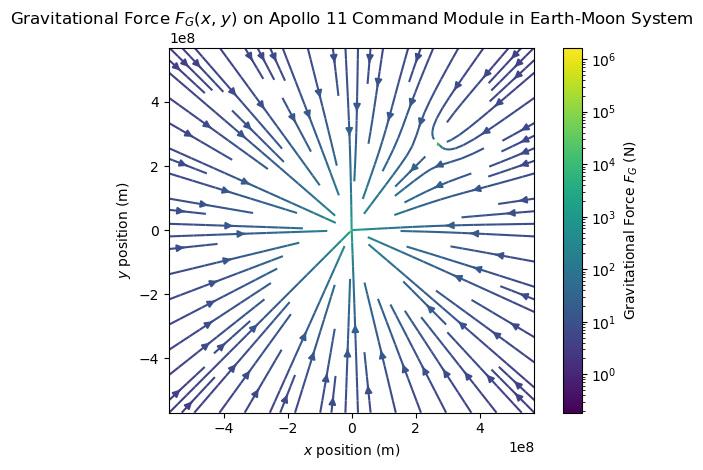

In [8]:
# Question 2

x_vals = np.linspace(-1.5*d_Earth_Moon, 1.5*d_Earth_Moon, n_big)
y_vals = np.linspace(-1.5*d_Earth_Moon, 1.5*d_Earth_Moon, n_big)
x_grid, y_grid = np.meshgrid(x_vals, y_vals)

Fx_Earth, Fy_Earth = F_G(M_Earth, m_Apollo, 0, 0, x_grid, y_grid)
Fx_Moon, Fy_Moon = F_G(M_Moon, m_Apollo, d_Earth_Moon/np.sqrt(2), d_Earth_Moon/np.sqrt(2), x_grid, y_grid)
Fx_vals = Fx_Earth + Fx_Moon
Fy_vals = Fy_Earth + Fy_Moon
F_abs = np.hypot(Fx_vals, Fy_vals)

fig, ax = plt.subplots()
stream = ax.streamplot(x_grid, y_grid, Fx_vals, Fy_vals, color=F_abs, norm=colors.LogNorm(vmin=np.nanmin(F_abs), vmax=np.nanmax(F_abs)))

cbar = fig.colorbar(stream.lines)
ax.set_aspect("equal")

ax.set_title(r'Gravitational Force $F$$_G$($x$, $y$) on Apollo 11 Command Module in Earth-Moon System')
ax.set_xlabel(r'$x$ position (m)')
ax.set_ylabel(r'$y$ position (m)')
cbar.set_label(r'Gravitational Force $F$$_G$ (N)')
plt.tight_layout()
plt.savefig("Lab 1 Part 3 Question 2")

# Part 4: Altitude of the Saturn V Rocket

In [9]:
# Question 1

def T(m_0, m_f, m_dot):
    return (m_0 - m_f)/m_dot

print(f"Burn Time T = {T(m_wet, m_dry, burn_rate):.1f} s")

Burn Time T = 157.7 s


In [10]:
# Question 2

def nonvect_delta_v(t, m_0, m_f, m_dot, v_e, g):
    if t >= (m_0 - m_f)/m_dot: # if t == T
        m_t = m_f
    else:
        m_t = m_0 - m_dot*t
    return v_e*np.log(m_0/m_t) - g*t
delta_v = np.vectorize(nonvect_delta_v)

In [11]:
# Question 3

h, err = quad(delta_v, 0, (m_wet-m_dry)/burn_rate, args=(m_wet, m_dry, burn_rate, v_exhaust, g))
print(f"Altitude After Burning h = {h:1.2e} m")

Altitude After Burning h = 7.41e+04 m
